In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

Here, I have used data of H1B Visa Petitions from kaggle: https://www.kaggle.com/nsharan/h-1b-visa/data 

In [2]:
#get data
data = pd.read_csv("h1b.csv")

In [3]:
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


Data pre-processing for EDA includes, checking the number of null values and replacing the nulls with the appropriate values; we can also drop the rows with null values but dropping the values can lead to much mis-guided analysis and conclusion of analysis. Hence, one must prefer to fill the null values

In [4]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

Null values can be filled using imputer and TransformerMixin or by using fillna

In [5]:
#imputer allows to deal with missing values
from sklearn.preprocessing import Imputer 
from sklearn.base import TransformerMixin

In [6]:
#Functions to deal with null values and keep the original values
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [7]:
#Set the transformed data
X = data
X = DataFrameImputer().fit_transform(X)

In [8]:
#count of null values after replacing null values with the mean
X.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

We will now check the data for min max and standard deviated values and making sure that the data in each column is appropriate

In [9]:
X.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002458e+06,3.002458e+06,3.002458e+06,3.002458e+06
mean,1.501230e+06,1.469961e+05,2.013855e+03,-9.192096e+01,3.819420e+01
std,8.667351e+05,5.287535e+06,1.680609e+00,1.933352e+01,4.591957e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.059378e+02,3.485262e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.574966e+01,4.082066e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


We see that the minimum wage is zero in some cases, which can not be the situation and hence we will replace the 0s in wage by mean value of respective companies 

In [10]:
mean_prevailing_wage = X.groupby(X['EMPLOYER_NAME'])['PREVAILING_WAGE'].mean()
#print (mean_prevailing_wage)
X['PREVAILING_WAGE']=X.PREVAILING_WAGE.mask(X.PREVAILING_WAGE == 0,mean_prevailing_wage)

In [11]:
X.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002428e+06,3.002458e+06,3.002458e+06,3.002458e+06
mean,1.501230e+06,1.469976e+05,2.013855e+03,-9.192096e+01,3.819420e+01
std,8.667351e+05,5.287561e+06,1.680609e+00,1.933352e+01,4.591957e+00
min,1.000000e+00,1.516000e+01,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.059378e+02,3.485262e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.574966e+01,4.082066e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [12]:
dataset = X

We have now completed the data preprocessing.
Now, we will proceed with Data Analysis 

Using Analysis we will try to answer the following questions:
  1. What are the top 10 companies to file petition for H1B?
  2. What is the average salary of the top 10 companies filing petitions and how is it different from the average salary of top   10 companies according to the wage of the employees?
  3. How has H1B petition filing changed over years and how has the wage been given changed over the period?
  4. Which companies filed petitions for employees with the top 5 in-demand job of 2015?

In [13]:
employee_count = X['EMPLOYER_NAME'].value_counts()

In [14]:
employee_count.head(10)

INFOSYS LIMITED                                    130651
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
Name: EMPLOYER_NAME, dtype: int64

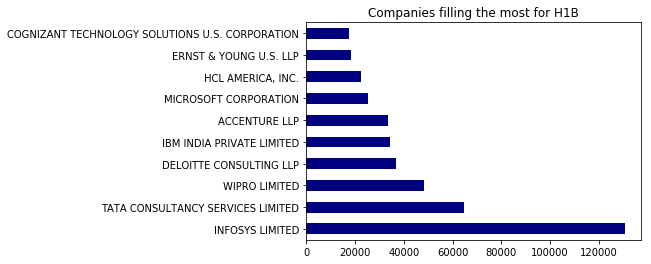

In [15]:
plot = X['EMPLOYER_NAME'].groupby([X['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Companies filling the most for H1B", color = 'navy')
plot.set_ylabel("")
plt.show()

The highest petitions are filed by Infosys Limited from 2011 to 2016, followed by other Indian companies like, Tata Consultancy Services, Wipro. 
We oberserve that:
Number of petitions filed by Infosys Limited (130651) is more than double of that filed by Tata Consultancy Services(64726) Limited which ranks second in the number of petitions filed. 

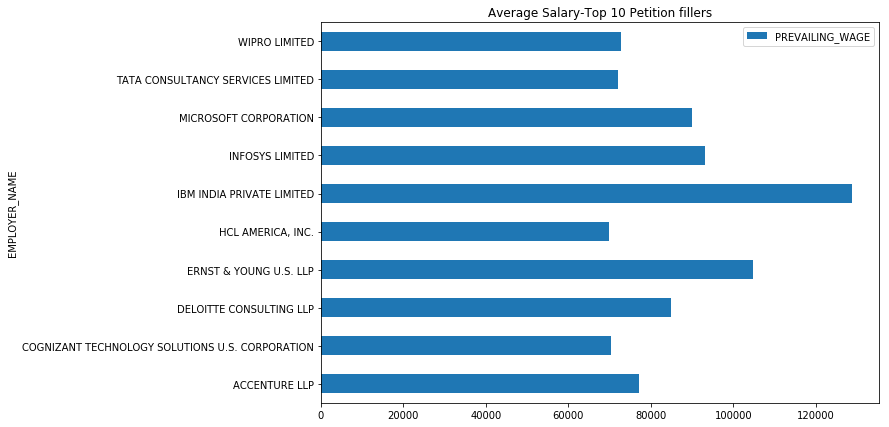

In [16]:
get_top_employers = list(X['EMPLOYER_NAME'].groupby(X['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
get_wage = X[['EMPLOYER_NAME', 'PREVAILING_WAGE']][X['EMPLOYER_NAME'].isin(get_top_employers)]
get_wage.head()
get_wage.groupby('EMPLOYER_NAME').mean().plot(kind='barh', figsize=(10,7), title="Average Salary-Top 10 Petition fillers", sort_columns=True)
plt.show()

In [17]:
data_for_wage = dataset

In [18]:
get_wage_all = data_for_wage[['EMPLOYER_NAME', 'PREVAILING_WAGE']]
mean_wage_of_all = get_wage_all.groupby('EMPLOYER_NAME').mean()
mean_wage_of_all = mean_wage_of_all.nlargest(10, 'PREVAILING_WAGE')
mean_wage_of_all
#mean_wage_of_all.head(10)
# .plot(kind='barh', figsize=(10,7), title="Average Salary-Top 10 Petition fillers", sort_columns=True)
# plt.show()

,PREVAILING_WAGE
EMPLOYER_NAME,
OMPI OF AMERICA INC.,212987840.0
"UROLOGY TODAY, LLC",173139200.0
INNOBOX SYSTEMS,172363360.0
BAALAAJEE INC.,143440766.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,134702089.5
BAYSHORE GLOBAL MANAGEMENT LLC,126235824.0
"MANHATTAN SOFTWARE, INC.",123907680.0
GYM-PACT CORP,123389760.0
"BOOKRENTER.COM, INC.",123032124.8


Taking into consideration an assumption that the data collected in prevailing wage has discrepancies as 212987840.0 is a large amount, I have taken into consideration the prevailing wage which is less than 138,000 (the average highest salary in tech company) 

In [19]:
improvised_wage_data = dataset

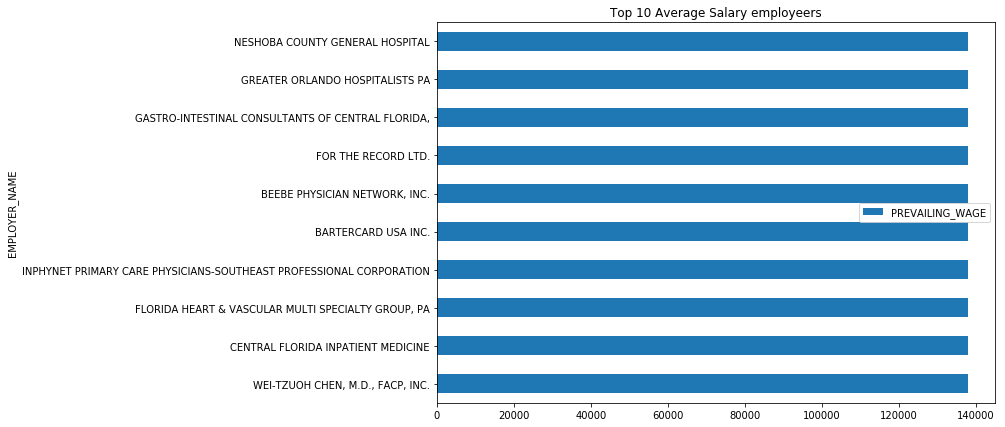

In [20]:
get_wage_all_improved = data_for_wage[['EMPLOYER_NAME', 'PREVAILING_WAGE']]
get_wage_all_improved = get_wage_all[get_wage_all['PREVAILING_WAGE'] <= 138000]
mean_wage_of_all_improved = get_wage_all_improved.groupby('EMPLOYER_NAME').mean()
mean_wage_of_all_improved_largest = mean_wage_of_all_improved.nlargest(10, 'PREVAILING_WAGE')
#mean_wage_of_all_improved
#mean_wage_of_all_improved_largest.head(10)
mean_wage_of_all_improved_largest.plot(kind='barh', figsize=(10,7), title="Top 10 Average Salary employeers", sort_columns=True)
plt.show()

We observe that the highest paying employeers are not in the list of top H1B petitioners, we also observe that 7/10 are medicinal related companies or hospitals

In [21]:
data_for_petition_patern = dataset

In [22]:
petition_count = data_for_petition_patern['YEAR'].value_counts()
petition_count.head(6)

2016.0    647803
2015.0    618727
2014.0    519440
2013.0    442114
2012.0    415607
2011.0    358767
Name: YEAR, dtype: int64

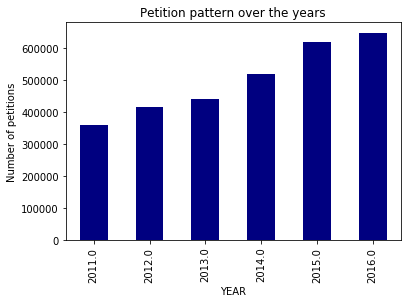

In [23]:
plot = data_for_petition_patern['YEAR'].groupby([data_for_petition_patern['YEAR']]).count().sort_values(ascending=True).head(10).plot(kind='bar', title="Petition pattern over the years", color = 'navy')
plot.set_ylabel("Number of petitions")
plt.show()

We observe that the number of petitions has incresed gradually over the years filed.

Let us see the contribution of top 10 companies for each year in petition filing

In [24]:
h1b_petetion_top10 = dataset

In [25]:
topEmp = list(h1b_petetion_top10['EMPLOYER_NAME'].groupby(h1b_petetion_top10['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)
emp_year = h1b_petetion_top10[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][h1b_petetion_top10['EMPLOYER_NAME'].isin(topEmp)]
emp_year = emp_year.groupby([h1b_petetion_top10['EMPLOYER_NAME'],h1b_petetion_top10['YEAR']])

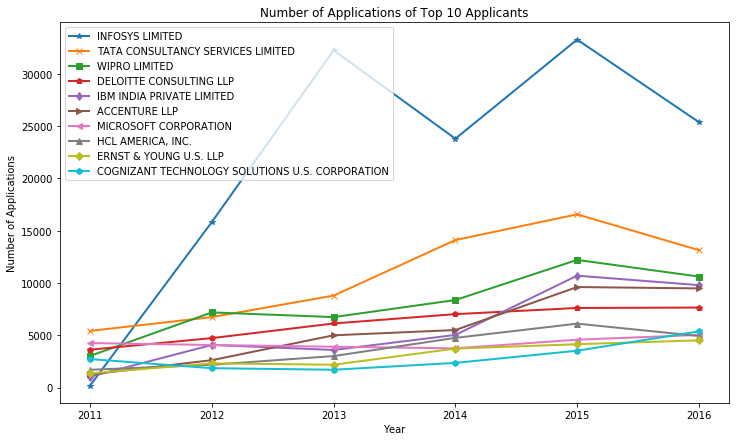

In [26]:
patern=['*','x','s','p','d','>','<','^','D','h']
fig = plt.figure(figsize=(12,7))
for company in topEmp:
    temp = emp_year.count().loc[company]
    #print(temp)
    plt.plot(temp.index.values, temp["PREVAILING_WAGE"].values, label=company, linewidth=2,marker=patern[topEmp.index(company)])
    
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

There has been an increase all the years for each of the company.Infosys Limited shows the maximum flux during each year with a drop in 2014 whereas, all the other have a steady increase in the number of applications.


Let us check the acceptance rate of the petitions for top 5 filers.

In [27]:
get_top_employers = list(X['EMPLOYER_NAME'].groupby(X['EMPLOYER_NAME']).count().sort_values(ascending=False).head(5).index)
for company in get_top_employers:
    get_company = X[X.EMPLOYER_NAME==company] #Data for manhattan in the year 2016
    case_count = (get_company['CASE_STATUS'].value_counts())
    print (company)
    print (case_count)
   

INFOSYS LIMITED
CERTIFIED              129940
DENIED                    332
WITHDRAWN                 303
CERTIFIED-WITHDRAWN        76
Name: CASE_STATUS, dtype: int64
TATA CONSULTANCY SERVICES LIMITED
CERTIFIED              64237
WITHDRAWN                308
DENIED                   121
CERTIFIED-WITHDRAWN       60
Name: CASE_STATUS, dtype: int64
WIPRO LIMITED
CERTIFIED              43476
CERTIFIED-WITHDRAWN     3818
WITHDRAWN                620
DENIED                   203
Name: CASE_STATUS, dtype: int64
DELOITTE CONSULTING LLP
CERTIFIED              36120
DENIED                   547
WITHDRAWN                 67
CERTIFIED-WITHDRAWN        8
Name: CASE_STATUS, dtype: int64
IBM INDIA PRIVATE LIMITED
CERTIFIED              27745
WITHDRAWN               3793
CERTIFIED-WITHDRAWN     2260
DENIED                   421
Name: CASE_STATUS, dtype: int64


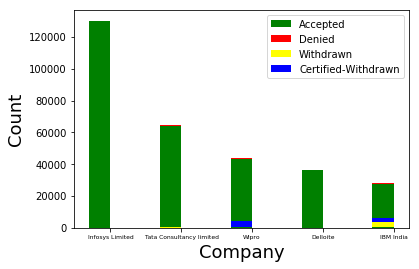

In [28]:
Accepted = [129940, 64237, 43476, 36120, 27745]
Denied = [332, 121, 203, 547, 421]
Withdrawn = [303, 308, 620, 67, 3793] 
Certified_Withdrawn = [76, 60, 3818, 8, 2260]


fig = plt.figure(facecolor="white")

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.3
bar_l = np.arange(1, 6)
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1 = ax.bar(bar_l, Accepted, width=bar_width, label="Accepted", color="green")
ax2 = ax.bar(bar_l, Denied, bottom=Accepted, width=bar_width, label="Denied", color="red")
ax3 = ax.bar(bar_l, Withdrawn, bottom=Denied, width=bar_width, label="Withdrawn", color="yellow")
ax4 = ax.bar(bar_l, Certified_Withdrawn, bottom=Withdrawn, width=bar_width, label="Certified-Withdrawn", color="blue")
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("Company", fontsize=18)
ax.legend(loc="best")
plt.xticks(tick_pos, ["Infosys Limited", "Tata Consultancy limited", "Wipro", "Delloite", "IBM India"], fontsize=6)
plt.yticks(fontsize=10)

plt.show()

In [29]:
data_for_wage_over_time = dataset

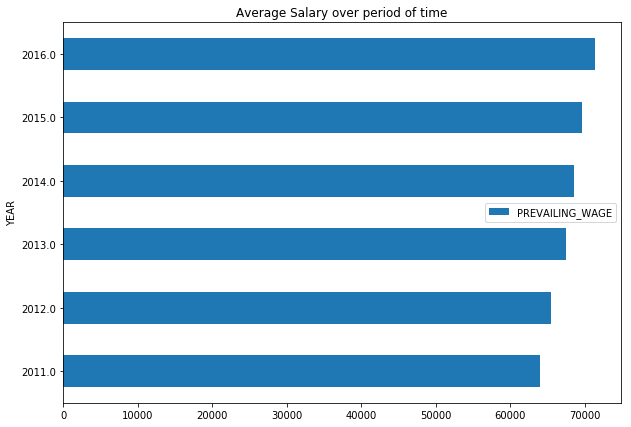

In [30]:
get_wage_over_time = data_for_wage_over_time[['EMPLOYER_NAME','YEAR', 'PREVAILING_WAGE']]
get_wage_over_time = get_wage_over_time[get_wage_over_time['PREVAILING_WAGE'] <= 138000]
mean_wage_over_time = get_wage_over_time.groupby('YEAR').mean()
mean_wage_over_time.plot(kind='barh', figsize=(10,7), title="Average Salary over period of time", sort_columns=True)
plt.show()

How has the average salary changed for top 10 petition filers over the period of time?

In [31]:
company_wage = dataset

In [32]:
company_wage = company_wage[company_wage['PREVAILING_WAGE'] <= 138000]
emp_over_year = company_wage[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][company_wage['EMPLOYER_NAME'].isin(topEmp)]
emp_over_year = emp_over_year.groupby([company_wage['EMPLOYER_NAME'],company_wage['YEAR']])

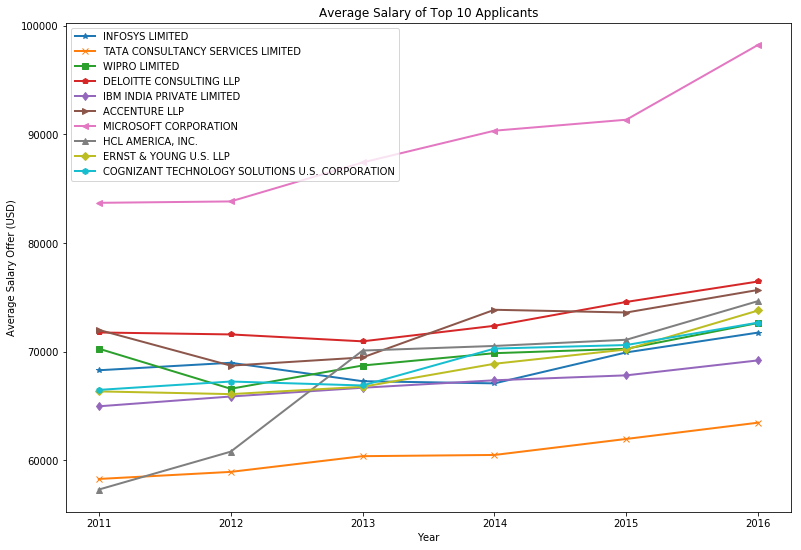

In [33]:
fig = plt.figure(figsize=(13,9))
for company in topEmp:
    temp = emp_over_year.mean().loc[company]
    #print (temp)
    plt.plot(temp.index.values, temp["PREVAILING_WAGE"].values, label=company, linewidth=2,  marker=patern[topEmp.index(company)])
        
plt.xlabel("Year")
plt.ylabel("Average Salary Offer (USD)")
plt.legend()
plt.title("Average Salary of Top 10 Applicants")
plt.show()

We observe that though being the highest petitioners, Infosys limited had very low average salary in 2013 and 2014 whereas Tata Consultancy Services has the least average salaries through the years. 

Low Average salary also depends on the location of the job, let us check the locations of the 3 top petitioners with lowest average salaries

In [34]:
dataframe_location = dataset

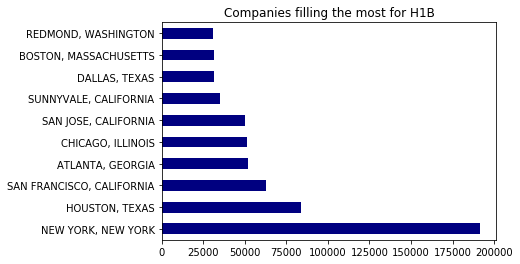

In [35]:
plot = dataframe_location['WORKSITE'].groupby([dataframe_location['WORKSITE']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Companies filling the most for H1B", color = 'navy')
plot.set_ylabel("")
plt.show()

In [36]:
dataframe_location_update = dataframe_location[['EMPLOYER_NAME', 'WORKSITE']].copy()
dataframe_location_update = dataframe_location_update.loc[dataframe_location_update['EMPLOYER_NAME'].isin(['INFOSYS LIMITED','TATA CONSULTANCY SERVICES LIMITED','WIPRO LIMITED'])]

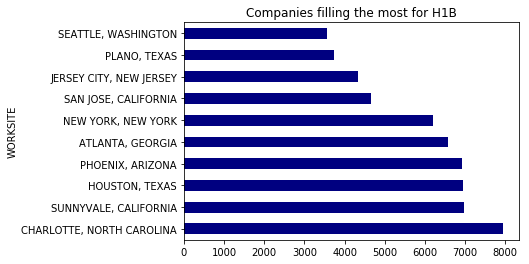

In [37]:
dataframe_location_update['WORKSITE'].groupby([dataframe_location_update['WORKSITE']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Companies filling the most for H1B", color = 'navy')
plot.set_ylabel("")
plt.show()

We can use the average salary of each state to further compare the relation of salaries and number of applications filed